# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=10))

{
          "data": {
                    "1": {
                              "id": 1,
                              "name": "Bitcoin",
                              "symbol": "BTC",
                              "website_slug": "bitcoin",
                              "rank": 1,
                              "circulating_supply": 18740237,
                              "total_supply": 18740237,
                              "max_supply": 21000000,
                              "quotes": {
                                        "USD": {
                                                  "price": 32768.0,
                                                  "volume_24h": 56387486399,
                                                  "market_cap": 614075274645,
                                                  "percentage_change_1h": 2.56140412596095,
                                                  "percentage_change_24h": -7.41217569557176,
                                              

In [6]:
# select the price of BTC
my_btc_value = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(my_btc_value)

40560.2304


In [7]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=10))

{
          "data": {
                    "1027": {
                              "id": 1027,
                              "name": "Ethereum",
                              "symbol": "ETH",
                              "website_slug": "ethereum",
                              "rank": 2,
                              "circulating_supply": 116388521,
                              "total_supply": 116388521,
                              "max_supply": 0,
                              "quotes": {
                                        "USD": {
                                                  "price": 1963.13,
                                                  "volume_24h": 43034785907,
                                                  "market_cap": 227905111404,
                                                  "percentage_change_1h": 2.3682024536475,
                                                  "percentage_change_24h": -11.3475699201106,
                                            

In [8]:
# select the ETH price
my_eth_value = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(my_eth_value)

2429.962314


In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40560.23
The current value of your 5.3 ETH is $2429.96


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stocks_today = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_stocks_today

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-18 00:00:00-04:00  115.05  115.39  114.91  115.29  5438261  417.08   

                                                              
                               high    low   close    volume  
time                                                          
2021-06-18 00:00:00-04:00  417.8281  414.7  415.01  92753385

In [13]:
# Fetch the current closing prices from the DataFrame
agg_close_price = float(df_stocks_today["AGG"]["close"])
spy_close_price = float(df_stocks_today["SPY"]["close"])

In [14]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.29
Current SPY closing price: $415.01


In [15]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20750.50
The current value of your 200 AGG shares is $23058.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_data = {
    "amount": [my_btc_value + my_eth_value, my_spy_value + my_agg_value],
}

tickers = ["crypto", "shares"]

df_savings = pd.DataFrame(df_data, index=tickers)


# Create savings DataFrame
#df_savings["Total Crypto Value"] = my_btc_value + my_eth_value
#df_savings["Total Shares Value"] = my_agg_value + my_spy_value

# Display savings DataFrame
display(df_savings)

,amount
crypto,42990.192714
shares,43808.500000


<AxesSubplot:title={'center':'Total Worth Pie Chart'}, ylabel='amount'>

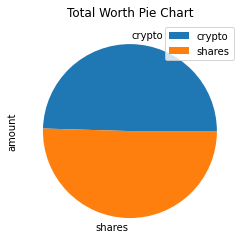

In [17]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Total Worth Pie Chart")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings = float(df_savings.sum())

# Calculate total amount of savings
# Validate saving health
if total_savings > emergency_fund:
    print("Congrats, my friend. You have enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congrats, my friend. You have reach your finacial goal!")
elif total_savings < emergency_fund:
    print("Keep saving! You are ${emeregency_fund - total_saving}away from your goal!")


Congrats, my friend. You have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker = ["AGG", "SPY"]

df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2017-06-12 00:00:00-04:00  109.51  109.6958  109.47  109.555  1184601  243.14   
2017-06-13 00:00:00-04:00  109.43  109.6000  109.43  109.580  1324388  243.99   
2017-06-14 00:00:00-04:00  110.00  110.1800  109.85  109.950  2304819  244.86   
2017-06-15 00:00:00-04:00  109.90  109.9000  109.78  109.870  1938779  242.68   
2017-06-16 00:00:00-04:00  109.86  109.9700  109.85  109.945  1709677  242.77   

                                                               
                             high       low   close    volume  
time                                                           
2017-06-12 00:00:00-04:00  243.42  242.3800  243.34  57096569  
2017-06-13 00:00:00-04:00  244.61  243.5799  244.52  43470532  
2017-06-14 00:00:00-04:00  244.87  243.2900  244.26  55098826  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243

In [28]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [29]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2017-06-12 00:00:00-04:00  109.51  109.6958  109.47  109.555  1184601   
2017-06-13 00:00:00-04:00  109.43  109.6000  109.43  109.580  1324388   
2017-06-14 00:00:00-04:00  110.00  110.1800  109.85  109.950  2304819   
2017-06-15 00:00:00-04:00  109.90  109.9000  109.78  109.870  1938779   
2017-06-16 00:00:00-04:00  109.86  109.9700  109.85  109.945  1709677   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2017-06-12 00:00:00-04:00          NaN  243.14  243.42  242.3800  243.34   
2017-06-13 00:00:00-04:00     0.000228  243.99  244.61  243.5799  244.52   
2017-06-14 00:00:00-04:00     0.003377  244.86  244.87  243.2900  244.26   
2017-06-15 00:00:00-04:00    -0.000728  242.68  243.91  242.3600  243.79   
2017-06-16 00:00:00-04:00     0.000683  242.77  242.83  241.6337  242.63   

                                                  
                             volume daily_return  
time                                              
2017-06-12 00:00:00-04:00  57096569          NaN  
2017-06-13 00:00:00-04:00  43470532     0.004849  
2017-06-14 00:00:00-04:00  55098826    -0.001063  
2017-06-15 00:00:00-04:00  51523068    -0.001924  
2017-06-16 00:00:00-04:00  48998243    -0.004758

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989890,1.000164,1.003898,1.005127,1.010227,1.000072,0.996868,1.012456,1.000110,1.001248,...,0.999794,1.009592,0.999908,1.003093,1.015858,0.993875,1.001081,0.984807,1.009065,1.005557
2,0.987278,1.020516,1.004214,1.017456,1.000739,0.999288,1.006019,1.007613,1.003972,0.996900,...,0.996815,1.003659,1.015240,1.009417,0.995176,0.995067,1.009339,0.979949,1.010063,1.010675
3,0.993245,1.013420,1.008160,1.016649,1.008912,1.015088,1.011685,1.017194,1.003132,0.999112,...,0.988185,0.999953,1.020835,1.010699,0.981403,0.988745,1.021505,0.975706,0.993828,1.002961
4,1.002527,1.014999,1.006325,1.023384,1.007368,1.023860,1.011998,1.005443,0.997840,0.998845,...,0.993645,0.992239,1.011895,1.009589,0.995208,1.004860,1.014183,0.984564,0.997631,0.995717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.727180,9.739050,42.318959,72.085499,3.523981,6.444600,23.823436,19.098829,15.752623,12.866322,...,26.672261,27.162192,7.340876,12.680541,6.882900,27.044998,14.260918,14.870604,36.055520,13.389885
7557,17.648824,9.662841,42.403161,72.344360,3.559002,6.494181,23.913519,19.100361,15.840746,12.911725,...,26.709964,26.851694,7.440740,12.949665,7.013225,26.845050,14.427112,14.945497,35.945985,13.387864
7558,17.640692,9.614947,42.307259,72.900966,3.557517,6.498320,23.814809,18.893391,15.875218,12.945087,...,26.333495,26.580278,7.437057,13.018826,7.075099,26.775610,14.310008,14.807190,36.545477,13.523016
7559,17.833642,9.699310,41.813755,72.096062,3.610454,6.513731,23.875183,19.348425,15.843186,12.814310,...,26.417322,26.538088,7.427549,12.939205,7.026885,26.916768,14.318738,14.875075,36.450096,13.481354


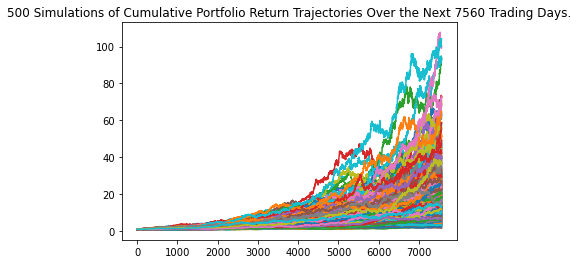

In [31]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()

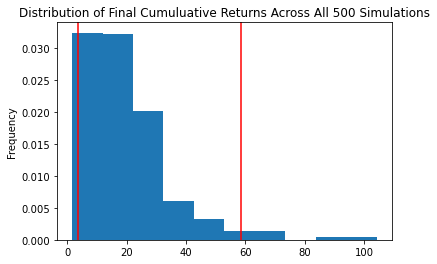

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30years.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean             19.882391
std              14.711646
min               1.680135
25%              10.092501
50%              15.998569
75%              25.231716
max             104.141257
95% CI Lower      3.510175
95% CI Upper     58.658956
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $70203.49 and $1173179.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment1,2)
ci_upper = round(tbl[9] * initial_investment1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $105305.24 and $1759768.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")